In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv("winequality.csv")

In [3]:
df=pd.DataFrame(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2293,7.3,0.40,0.28,6.5,0.037,26.0,97.0,0.99148,3.16,0.58,12.6,7.0
2294,7.0,0.32,0.31,6.4,0.031,38.0,115.0,0.99235,3.38,0.58,12.2,7.0
2295,7.5,0.42,0.19,6.9,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6.0
2296,6.9,0.28,0.31,7.2,0.040,47.0,168.0,0.99460,3.29,0.57,10.6,7.0


In [4]:
df.dropna(inplace=True)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
x=df.iloc[:,:-1]
y=df[["quality"]]

In [6]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
prd=km.fit_predict(df[["chlorides","alcohol"]])

In [7]:
df["cluster"]=prd

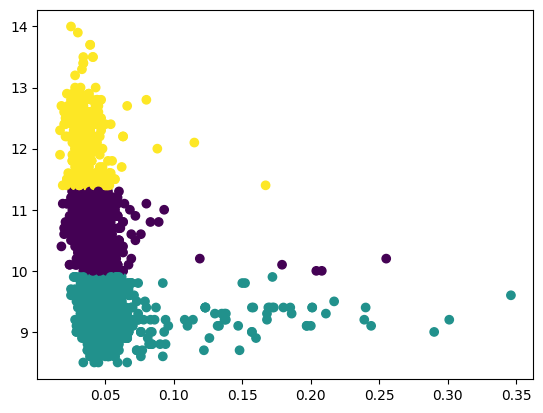

In [8]:
plt.scatter(df["chlorides"],df["alcohol"],c=prd)

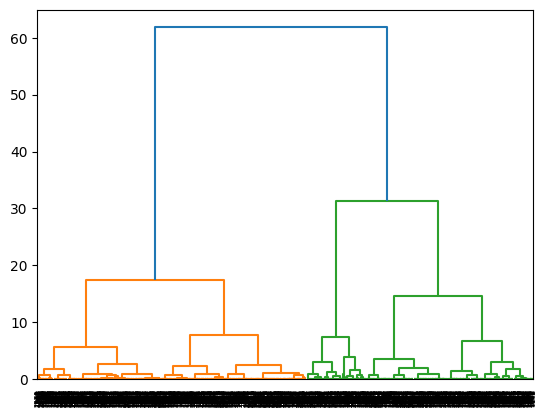

In [9]:
import scipy.cluster.hierarchy as chs
dend=chs.dendrogram(chs.linkage(df[["chlorides","alcohol"]],method="ward"))

In [10]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=2,linkage="ward")
label=agg.fit_predict(df[["chlorides","alcohol"]])

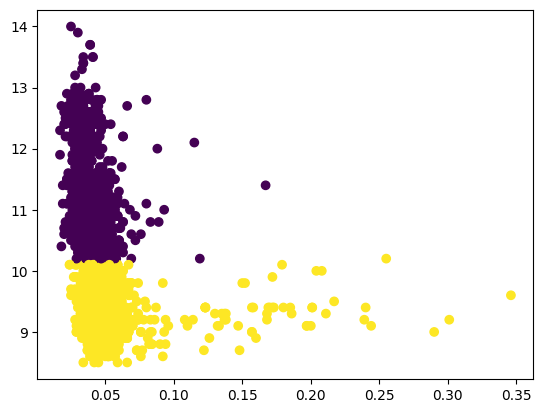

In [11]:
plt.scatter(df["chlorides"],df["alcohol"],c=label)

In [12]:
from sklearn.cluster import DBSCAN
d=DBSCAN(eps=3,min_samples=3)
pr=d.fit_predict(df[["chlorides","alcohol"]])
pr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

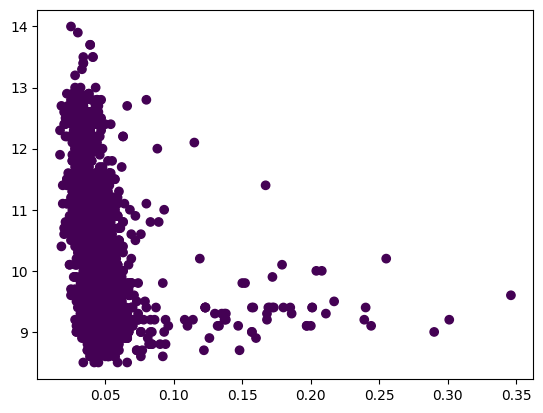

In [13]:
plt.scatter(df["chlorides"],df["alcohol"],c=pr)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
prd=lr.predict(xtest)
prd
print(lr.score(xtest,ytest))

0.21869548153960505


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
p=knn.predict(xtest)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [18]:
from sklearn.metrics import classification_report
print(classification_report(ytest,p))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.10      0.06      0.07        18
         5.0       0.40      0.44      0.42       151
         6.0       0.51      0.56      0.53       204
         7.0       0.29      0.22      0.25        77
         8.0       0.33      0.12      0.18         8

    accuracy                           0.43       460
   macro avg       0.27      0.23      0.24       460
weighted avg       0.42      0.43      0.42       460



<Axes: >

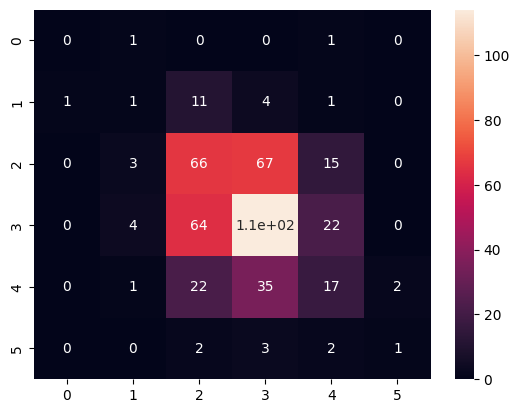

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(ytest,p)
sn.heatmap(cm,annot=True)

In [20]:
from sklearn.svm import SVC


In [21]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)
prd1=model.predict(xtest)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
print(classification_report(ytest,prd1))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.29      0.22      0.25        18
         5.0       0.55      0.44      0.49       151
         6.0       0.51      0.45      0.48       204
         7.0       0.32      0.57      0.41        77
         8.0       1.00      0.12      0.22         8
         9.0       0.00      0.00      0.00         0

    accuracy                           0.45       460
   macro avg       0.38      0.26      0.26       460
weighted avg       0.49      0.45      0.45       460



C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [23]:
list1=[0.45,0.43]
list2=["SVC","KNN"]

<BarContainer object of 2 artists>

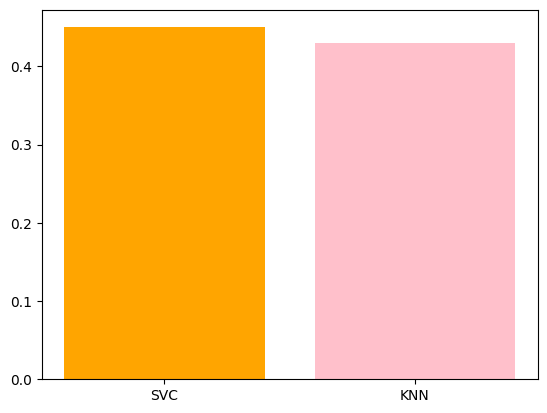

In [24]:
plt.bar(list2,list1,color=["orange","pink"])

In [25]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.data
iris.feature_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3,linkage="ward")
label=agg.fit_predict(df[["chlorides","alcohol"]])

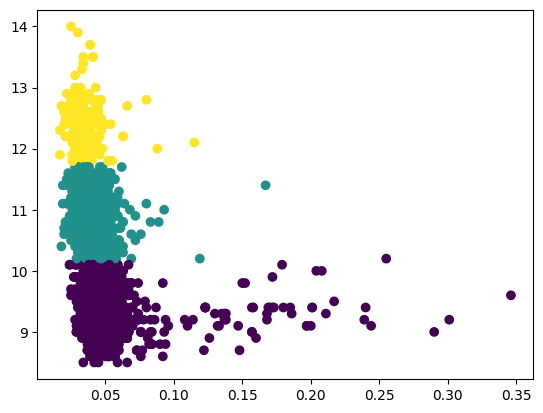

In [27]:
plt.scatter(df["chlorides"],df["alcohol"],c=label)